In [8]:
!pip install mpl_finance

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance as mpf
from datetime import datetime

In [10]:
plt.rcParams['figure.figsize']=[12,7]
plt.rc('font',size=14)

In [12]:
import yfinance

In [13]:
name = '^NSEI'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2021-01-01",end="2025-12-23")
df['Date'] = range(df.shape[0])
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [16]:
def plot_chart(df):
    fig, ax = plt.subplots()
    mpf.candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
    fig.tight_layout()
    fig.show()

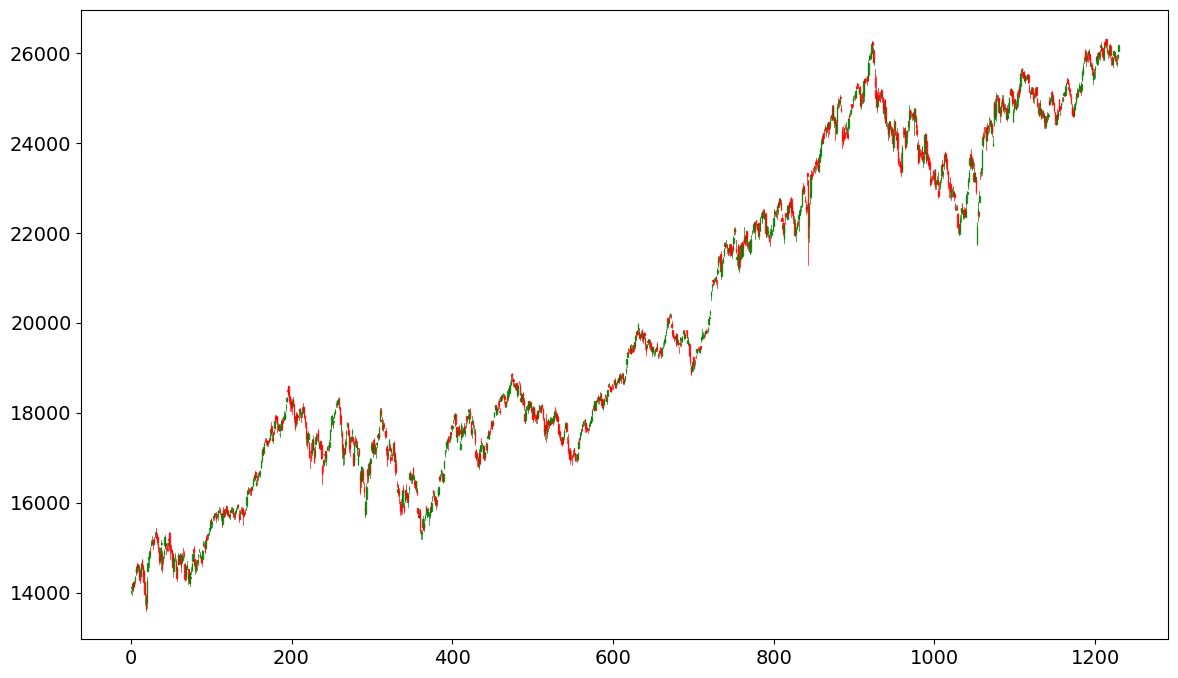

In [17]:
plot_chart(df)

In [18]:
df_ha = df.copy()
for i in range(df_ha.shape[0]):
  if i > 0:
    df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][i-1] + df['Close'][i-1])/2

  df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][i] + df['Close'][i] + df['Low'][i] +  df['High'][i])/4
df_ha = df_ha.iloc[1:,:]

/tmp/ipython-input-325306889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][i] + df['Close'][i] + df['Low'][i] +  df['High'][i])/4
/tmp/ipython-input-325306889.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][i-1] + df['Close'][i-1])/2
/tmp/ipython-input-325306889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_ha.loc[df_ha.

In [19]:
df_ha.head()

,Date,Open,High,Low,Close
Date,,,,,
2021-01-04 00:00:00+05:30,1,14007.299805,14147.950195,13953.750000,14084.737549
2021-01-05 00:00:00+05:30,2,14118.625000,14215.599609,14048.150391,14134.600098
2021-01-06 00:00:00+05:30,3,14137.325195,14244.150391,14039.900391,14167.812744
2021-01-07 00:00:00+05:30,4,14193.600098,14256.250000,14123.099609,14192.612305
2021-01-08 00:00:00+05:30,5,14195.549805,14367.299805,14221.650391,14298.650146


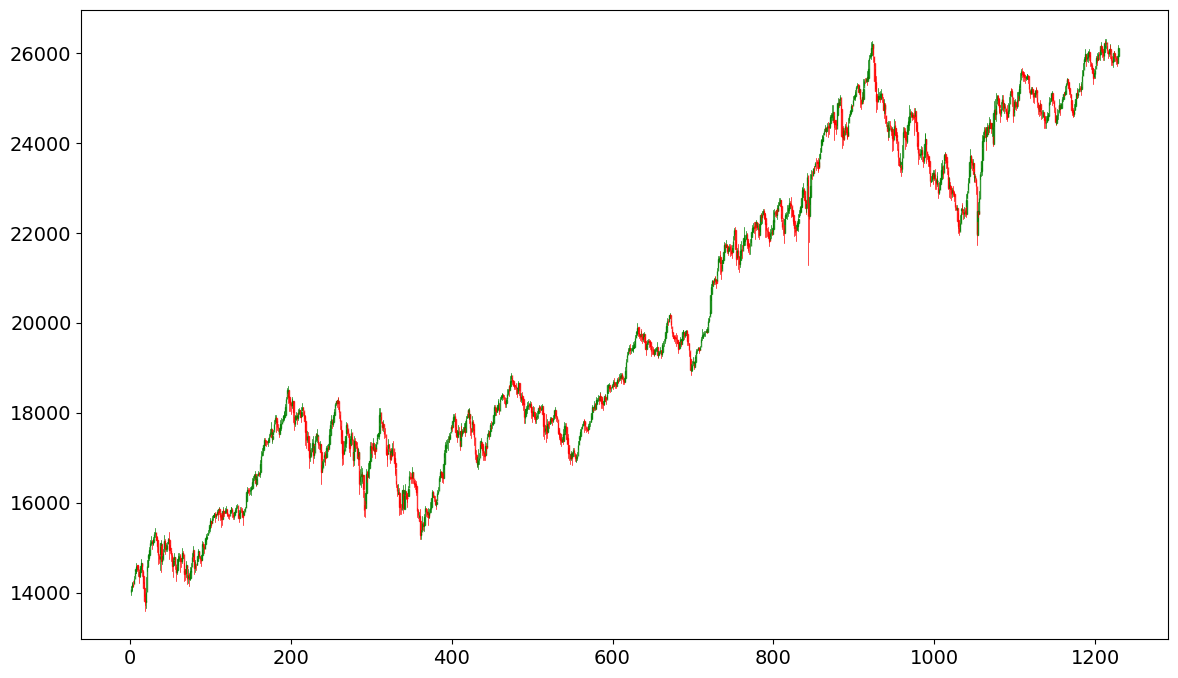

In [20]:
plot_chart(df_ha)